In [1]:
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for path
import os
print(os.listdir('C:/Users/x3yusk/PycharmProjects/algorithmtryouts/MLFun/Kmeans/'))

['.ipynb_checkpoints', 'kmeans.gif', 'Kmeans1.py', 'Mall exp.ipynb', 'mall-customers-clustering-analysis.ipynb', 'Mall.py', 'Mall_Customers.csv', 'Untitled.ipynb']


**reading data**

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
ff.create_table(df.head(5))

In [4]:
ff.create_table(df.describe(), index=True)

## Corrs

In [5]:
df.corr()
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [6]:
gender = df['Gender']
gender

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

## Data Viz

In [7]:
plt.rcParams['figure.figsize'] = (20,10)
def plot_data(title, xlabel, ylabel , colum , hist_or_dist,color=None):
    plt.subplot(1,2,1)
    sns.set(style = 'whitegrid')
    if hist_or_dist == 'dist':
        sns.distplot(df[colum], color=color)
    elif hist_or_dist == 'hist':
        if color:
            sns.barplot(x='Gender', y='CustomerID', data=df, color=color)
        else:
            sns.barplot(x='Gender', y='CustomerID', data=df, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

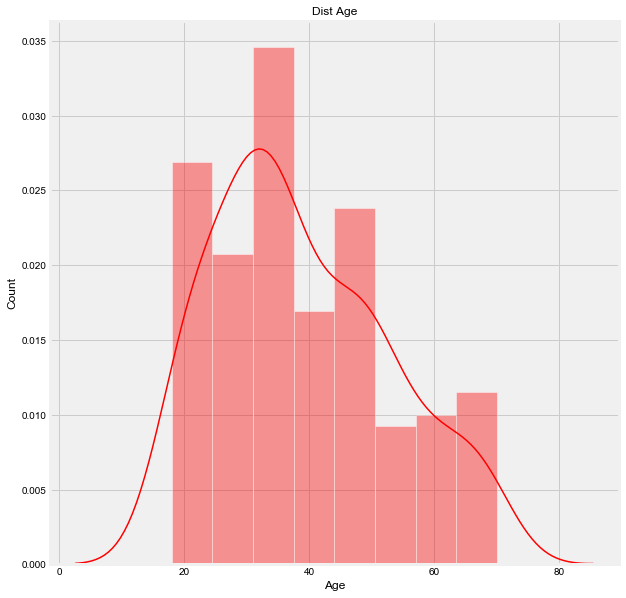

In [8]:
plot_data('Dist Age', 'Age', 'Count', 'Age', 'dist', color='red')
plt.show()

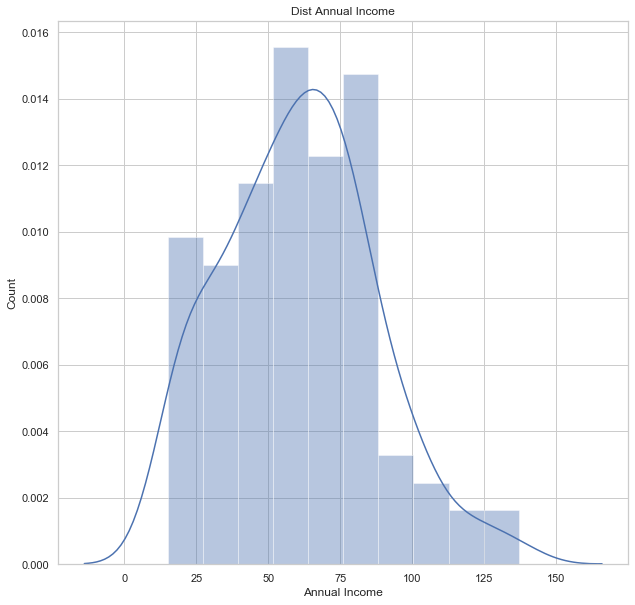

In [9]:
plot_data('Dist Annual Income', 'Annual Income', 'Count', 'Annual Income (k$)', 'dist')
plt.show()

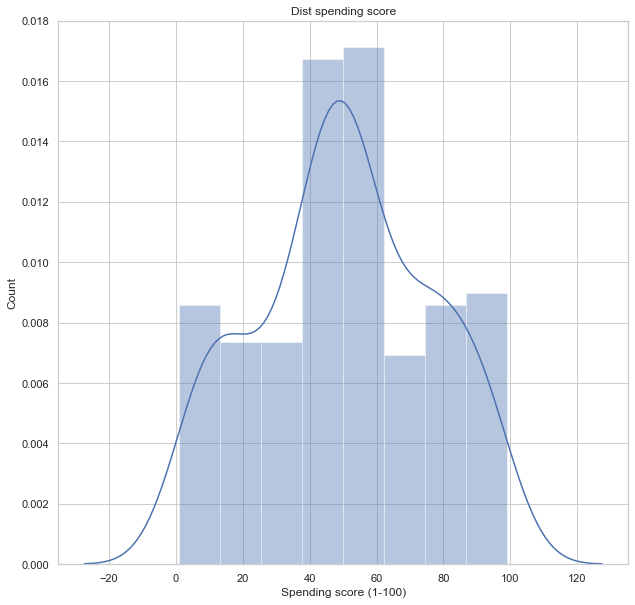

In [10]:
plot_data('Dist spending score', 'Spending score (1-100)', 'Count', 'Spending Score (1-100)', 'dist')

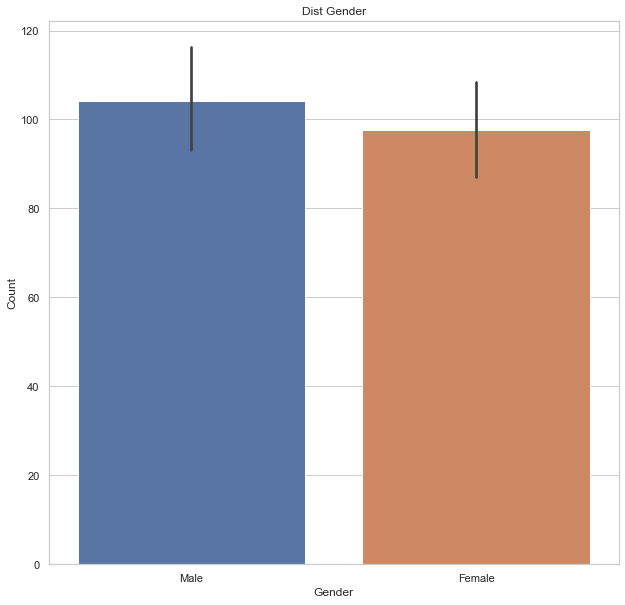

In [11]:
plot_data('Dist Gender', 'Gender', 'Count', 'Gender', 'hist')

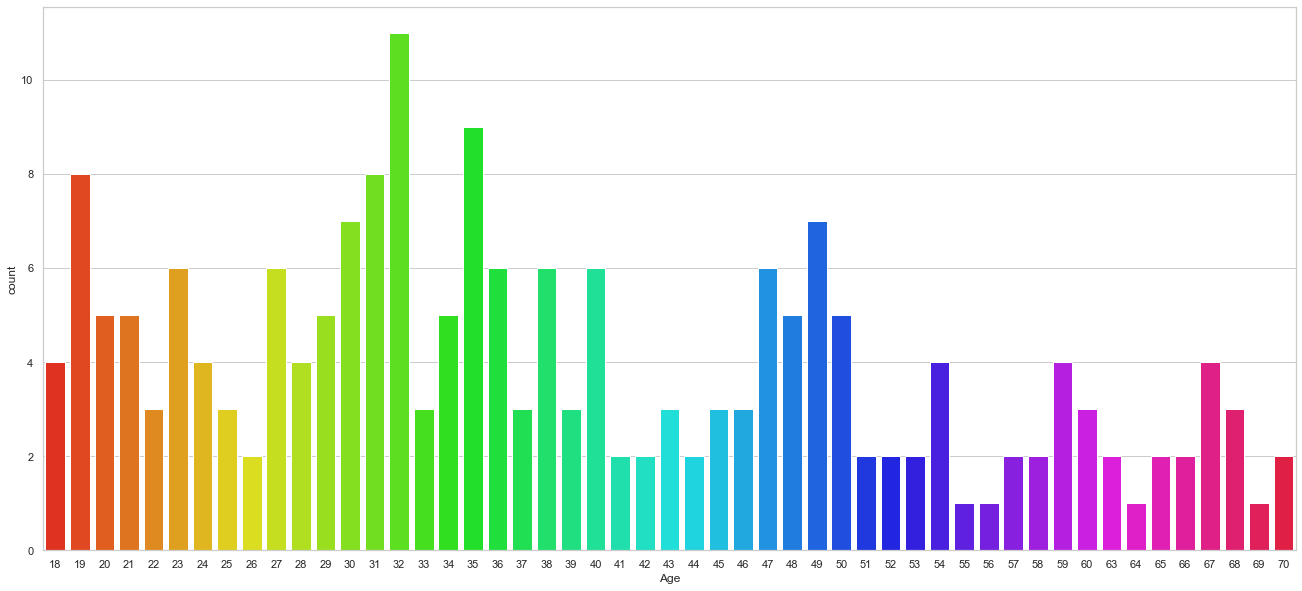

In [12]:
sns.countplot(df['Age'] , palette='hsv')
plt.show()

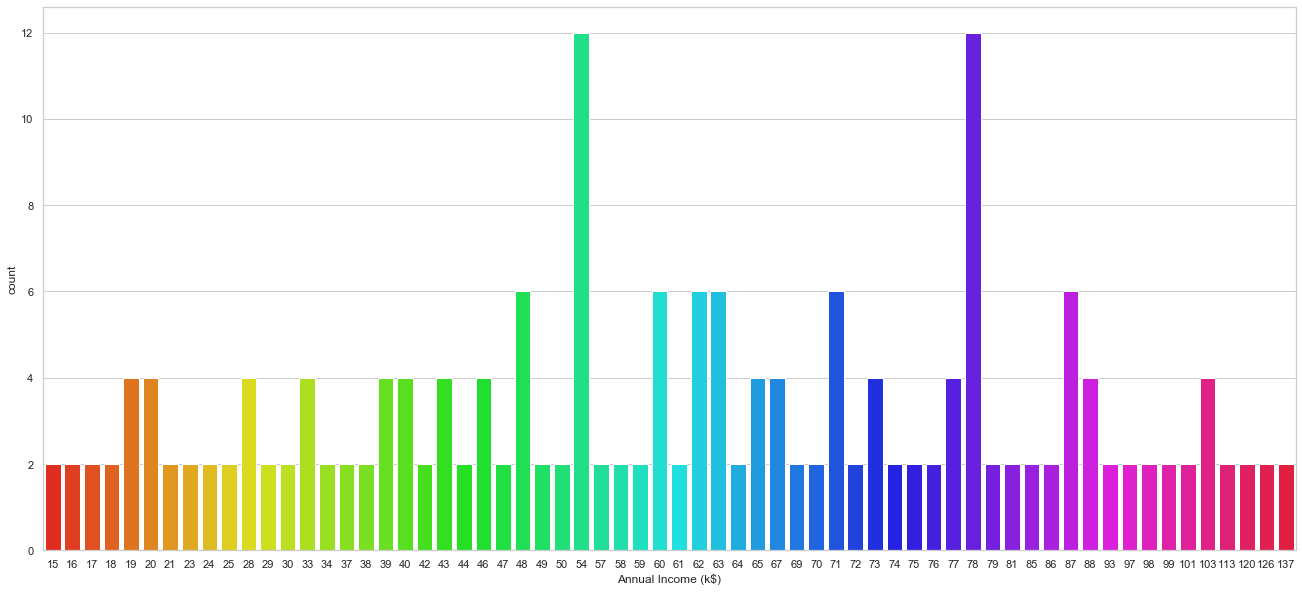

In [13]:
sns.countplot(df['Annual Income (k$)'] , palette='hsv')
plt.show()

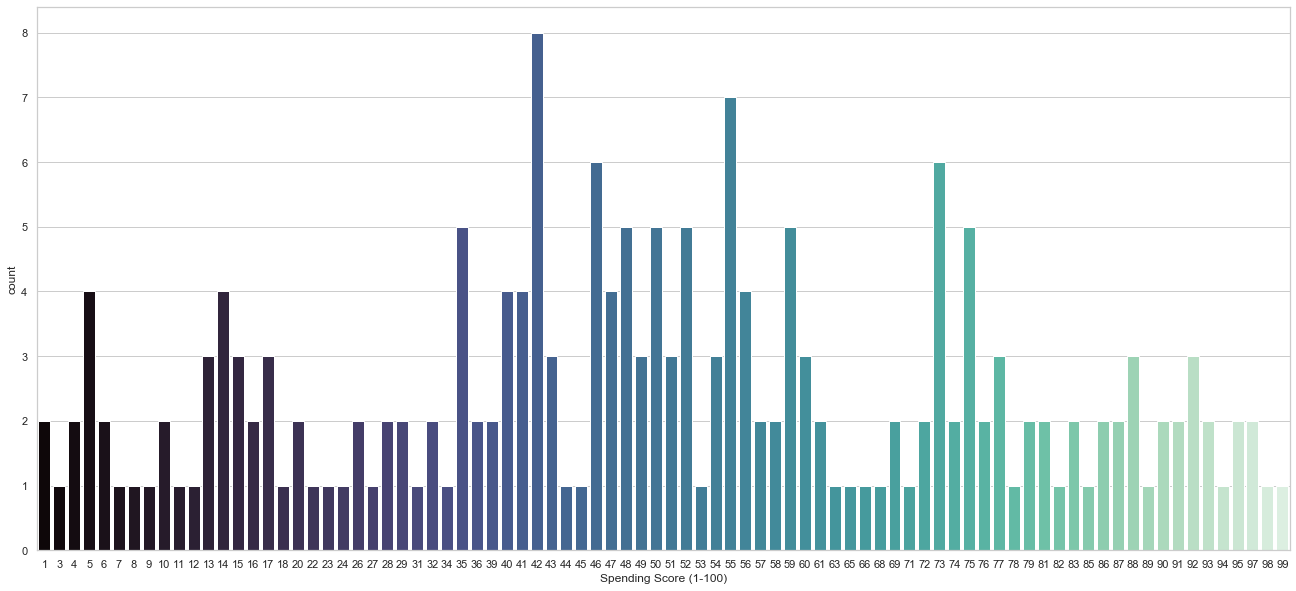

In [14]:
sns.countplot(df['Spending Score (1-100)'] , palette='mako')
plt.show()

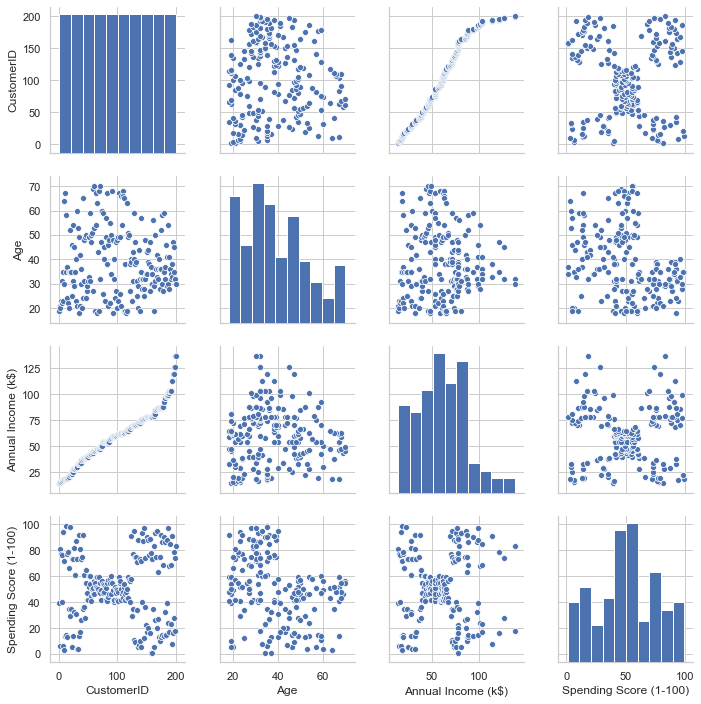

In [15]:
sns.pairplot(df)
plt.show()

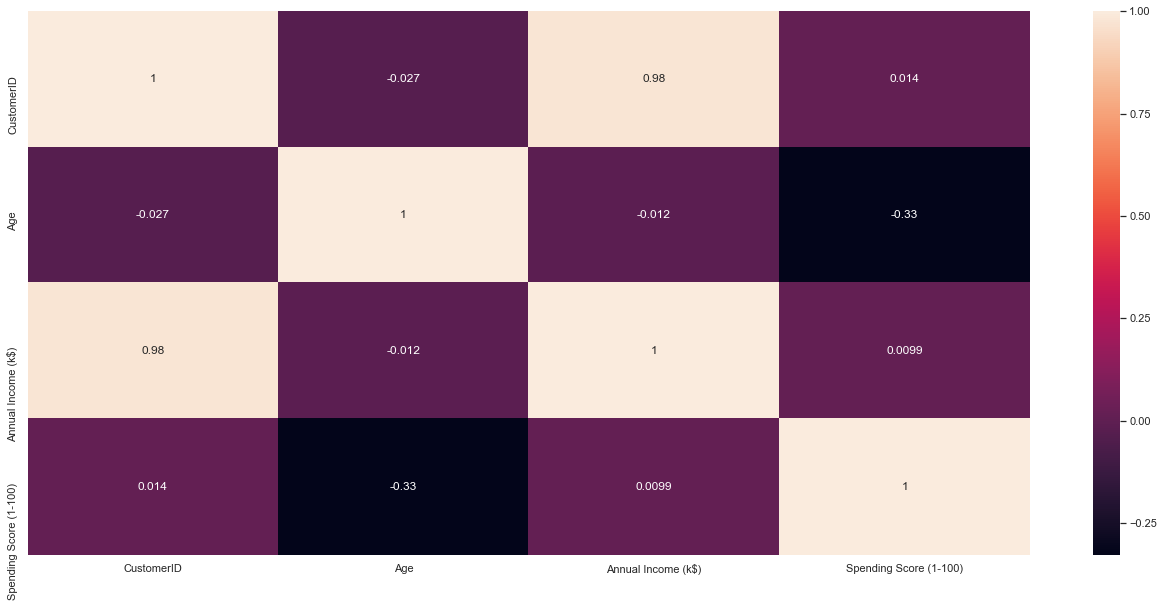

In [16]:
sns.heatmap(df.corr(), annot=True)

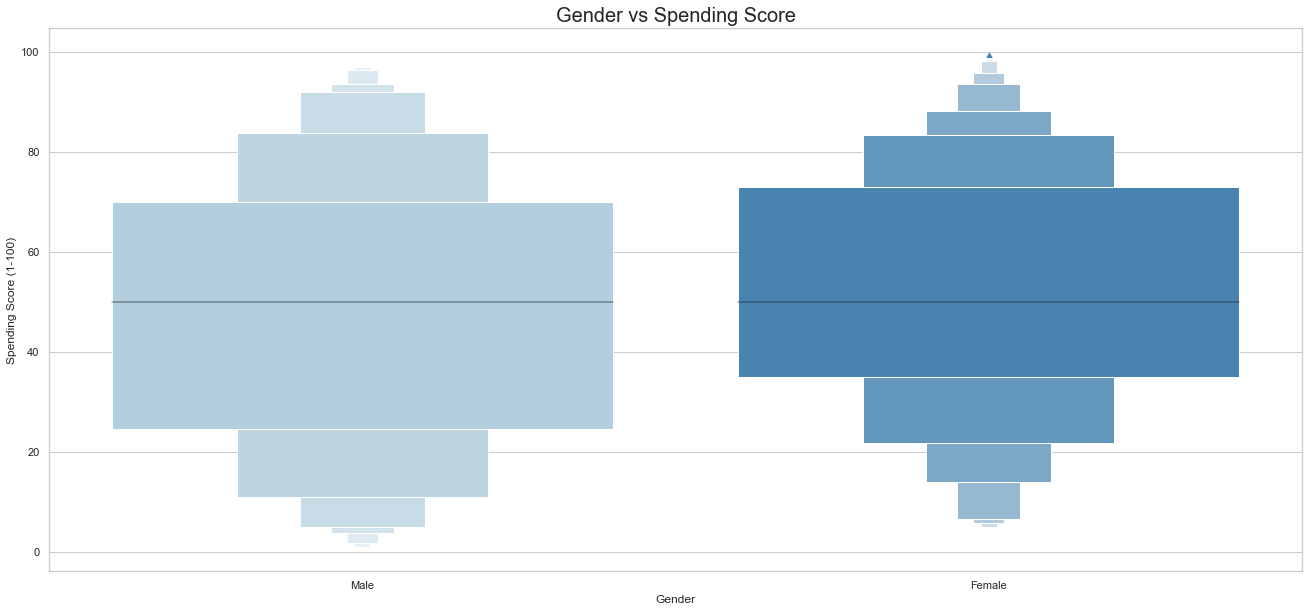

In [17]:
sns.boxenplot(df['Gender'], df['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

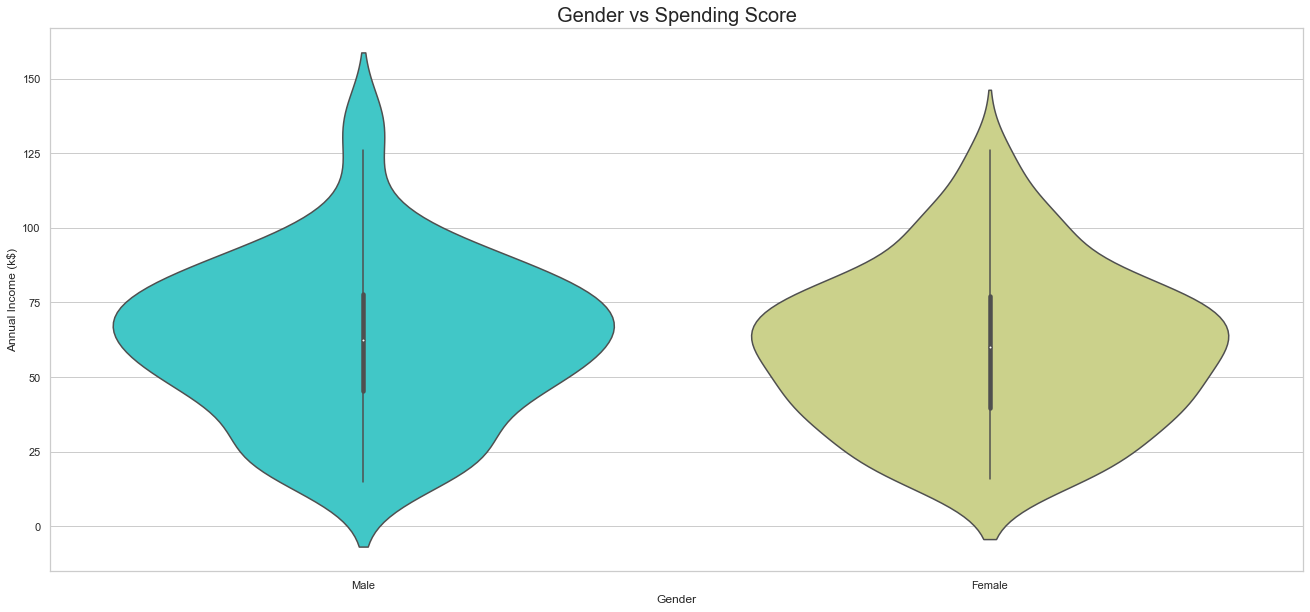

In [18]:
sns.violinplot(df['Gender'], df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

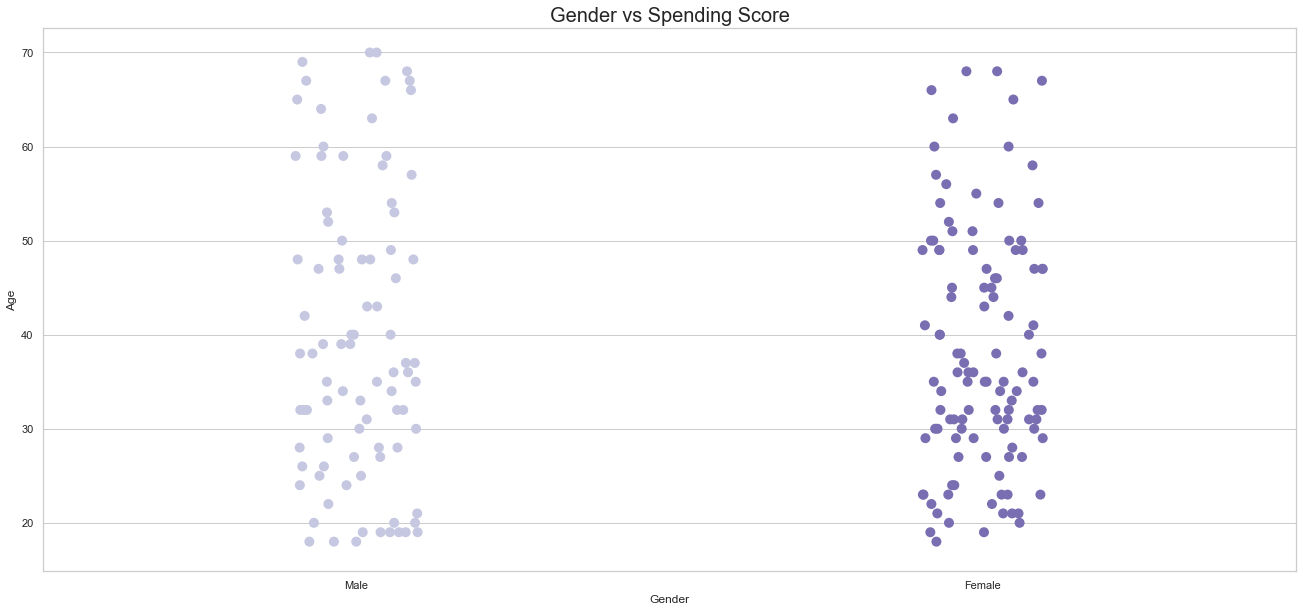

In [19]:
sns.stripplot(df['Gender'], df['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

# Cluster Analysis

In [20]:
def cluster_plot(i,y_means, cen_centroieds):
    x = x_scaled.values
    y_means = np.asarray(y_means)
    plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
    plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
    plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
    plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
    plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
    x1, y1 = zip(*(cen_centroieds))
    plt.scatter(x1 , y1, s = 50, c = 'blue' , label = 'centeroid')

    plt.style.use('fivethirtyeight')
    plt.title('K Means Clustering', fontsize = 20)
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.savefig("{i}.jpg".format(i=i))
    plt.show()

In [34]:
import numpy as np
import imageio
import collections
ECULID = 1
MANHATAN = 2

class Kmeans:

    def __init__(self):
        self.init_centroies = None


    def distance_factory(self,method , sample, init_centroies):
        if method == ECULID:
            return int(np.argmin([np.sqrt(np.sum([np.square(sample[i]-c[i]) for i in range(len(sample))])) for c in init_centroies]))
        elif method == MANHATAN:
            return int(np.argmin([np.sum([np.abs(sample - c)]) for c in init_centroies]))
    
    
    
    def train(self,k, X_train, iters = 5):
        self.init_centroies = list(X_train.sample(n=k).values)
        for index in range(iters +1):
            cen_choices = [[] for i in range(k)]
            cur_preds = []
            for sample in X_train.values:
                choice = self.distance_factory(1, sample, self.init_centroies)
                cen_choices[choice].append(sample)
                cur_preds.append(choice)
            for i, cen in enumerate(cen_choices):
                cen = np.asarray(cen)
                for j in range(len(cen[0])):
                    self.init_centroies[i][j] = np.average(cen[:,j])
            cluster_plot(index, cur_preds, self.init_centroies)
        print(index)
        
        with imageio.get_writer("test2.gif", mode='I') as writer:
                for image_index in list(range(index)):
                    writer.append_data(imageio.imread("{i}.jpg".format(i=image_index)))

    def predict(self, X_test):
        if not self.init_centroies:
            print('You need to train your model first')
        return [self.distance_factory(1, sample, self.init_centroies) for sample in X_test]

    def check_accuracy(self, preds, y_test):
        assert (len(preds) == len(y_test))
        print(np.sum([1 for p,y in zip(preds, y_test) if p ==y]) / len(preds))

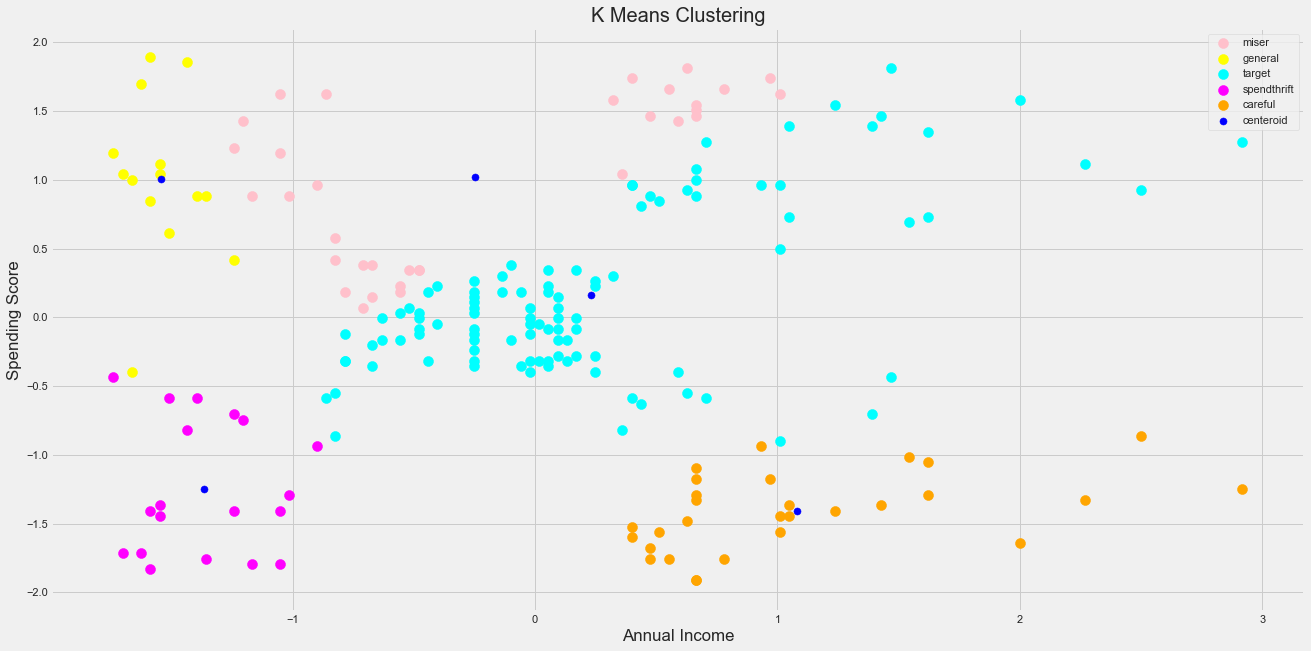

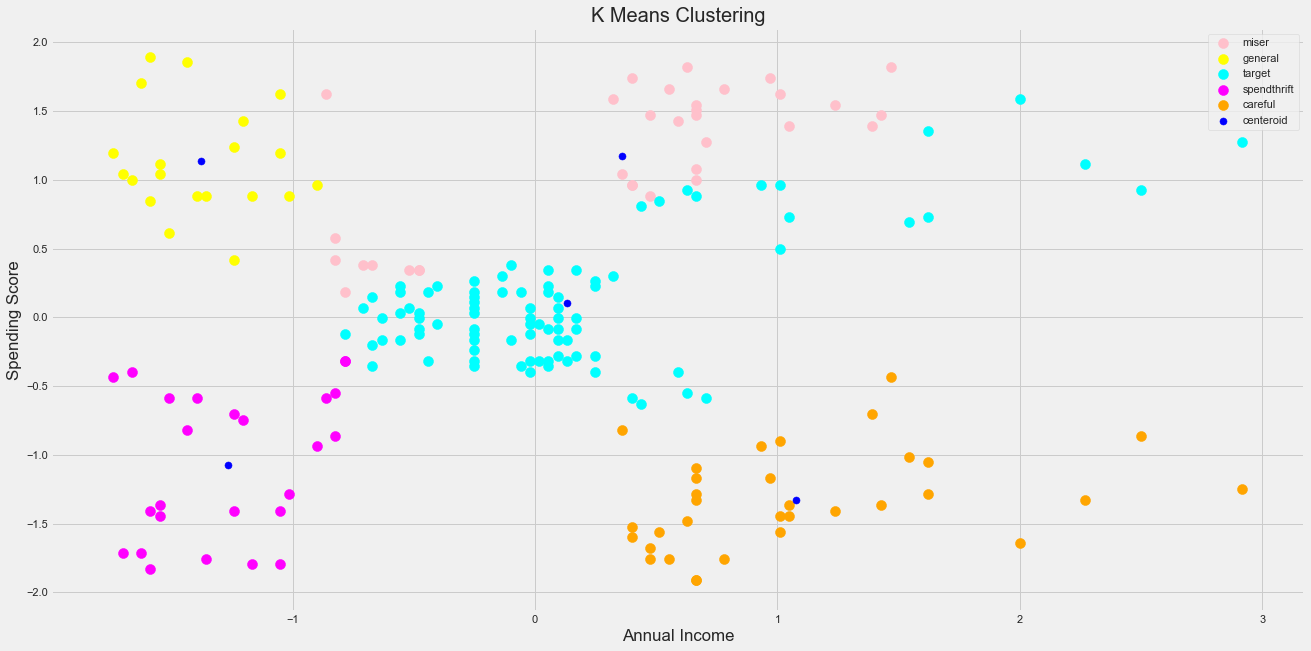

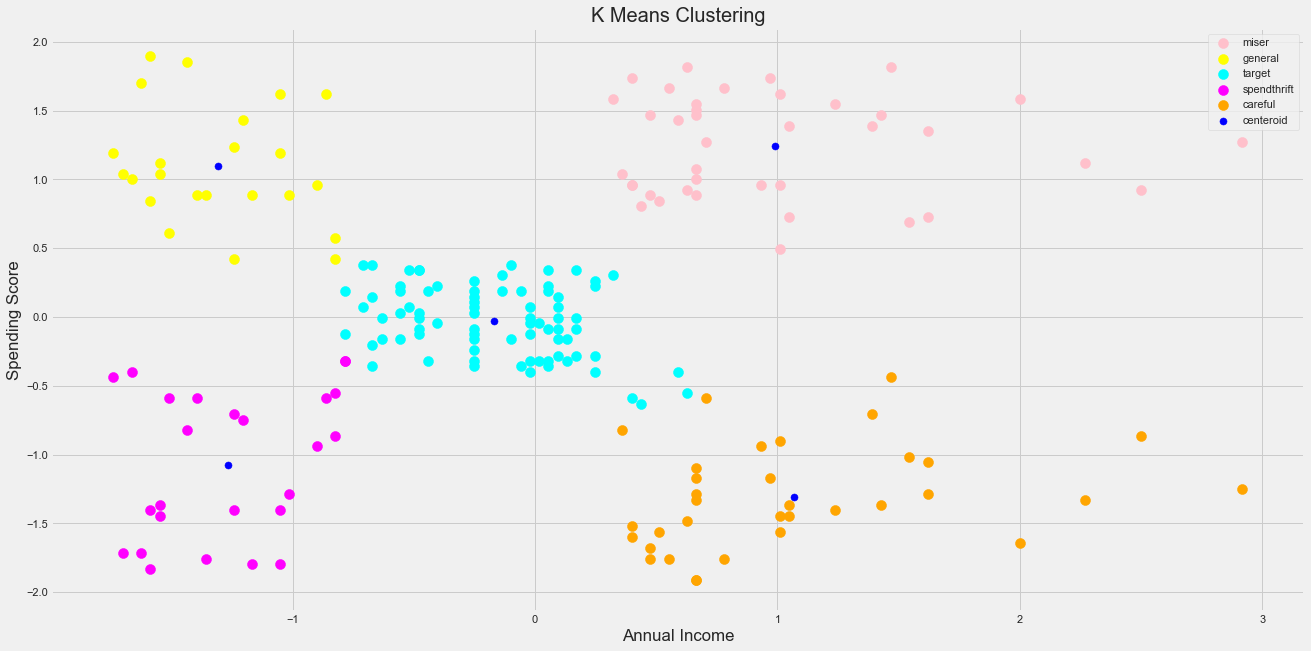

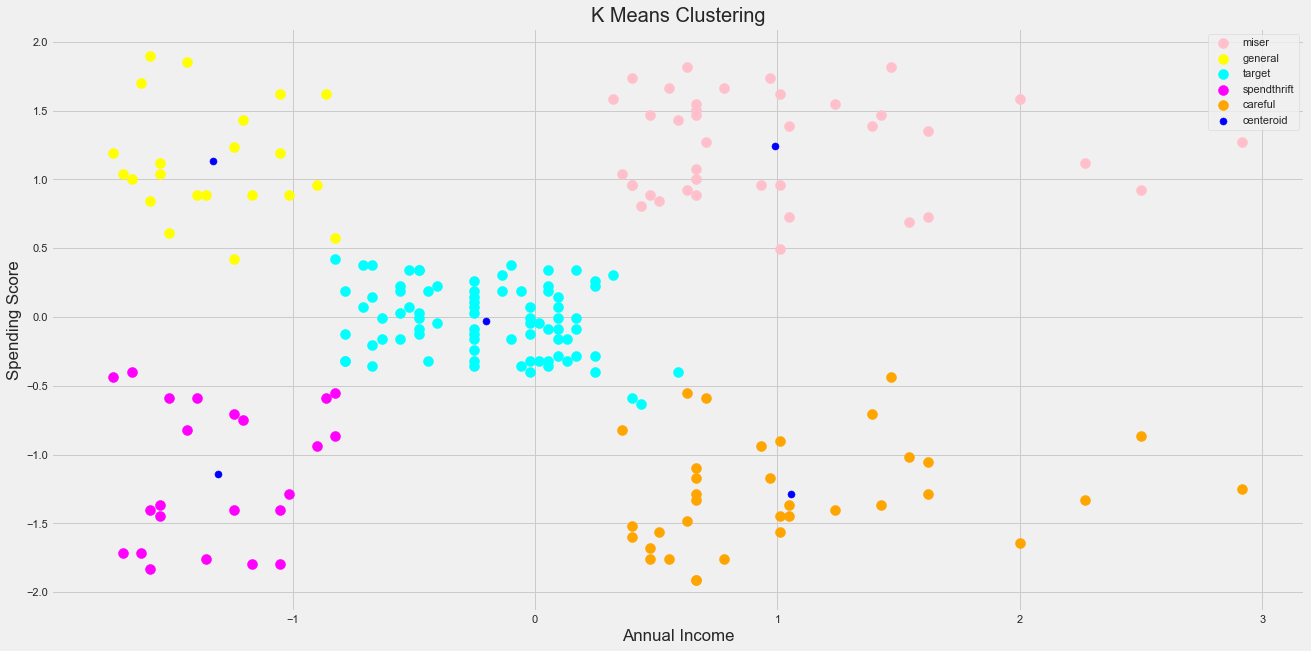

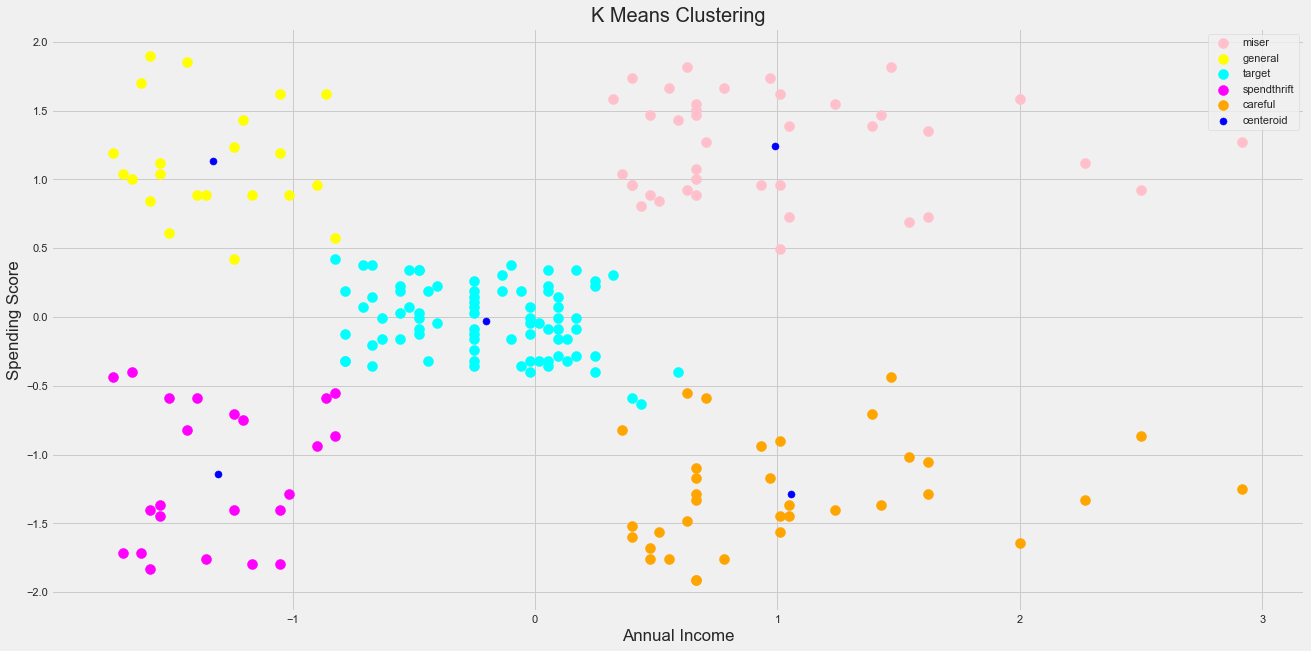

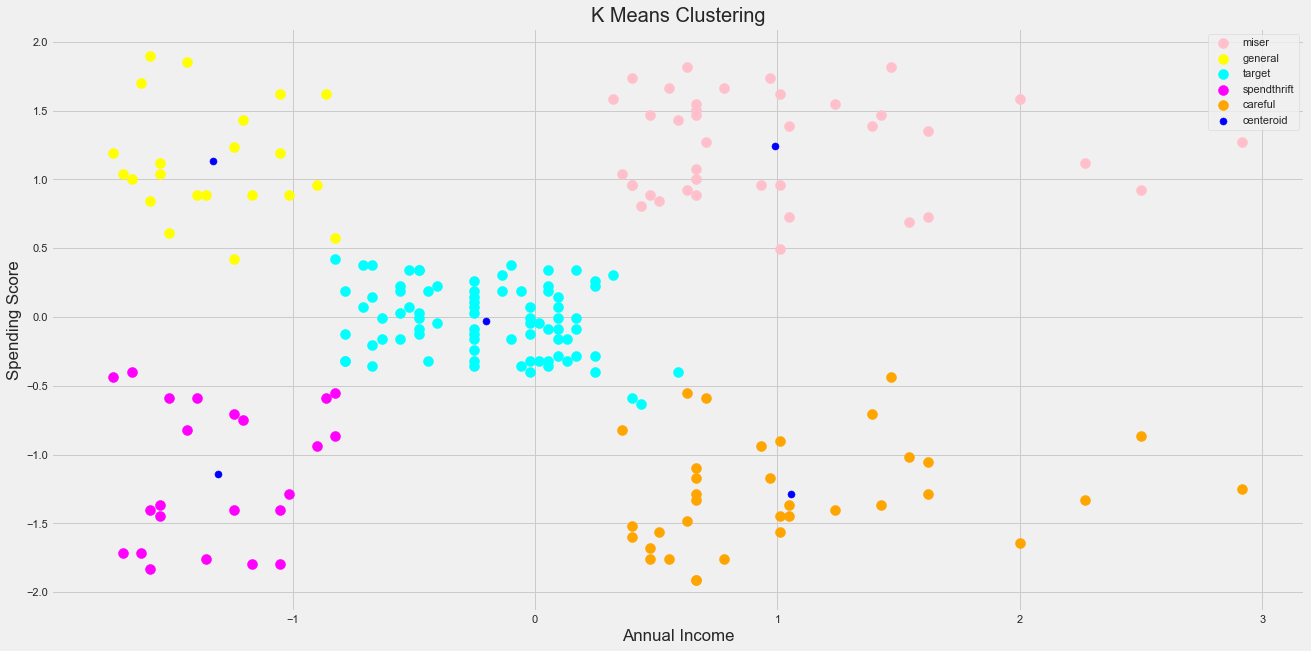

5


In [35]:
x = df.iloc[:, [3, 4]]
# print(x)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x))
k=5
km2 = Kmeans()
km2.train(k, x_scaled)

In [ ]:
ret = km2.predict(x_one)


In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
x = df.iloc[:, [3, 4]].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
print(type(y_means))
print(y_means == 0)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()